# Movie Recommender System

- __Collaborative__ filtering based on majority interest of the users.


- __Content based__ filtering/ individual tracking of a user.

DATA: 
Genere - __.Json type__

Movie Recommendation using EDA

___Score willl be created & based on that the recommendation of top 10 high score will be shown to the user___

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv("movies_metadata.csv", low_memory=False) # do not want to comress the data so False.
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [63]:
df.shape

(45466, 24)

In [64]:
df.tail() # last five records

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [65]:
df.info() #gives a basic insight to the kind of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

__We can observe not all have the complete rows as others, indicating the missing value__

In [66]:
df.shape

(45466, 24)

In [67]:
df.describe() # for basic statistical summary, Five point Summary

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


## Univariate  Analysis:

__Analysis done on only one variable at a time__

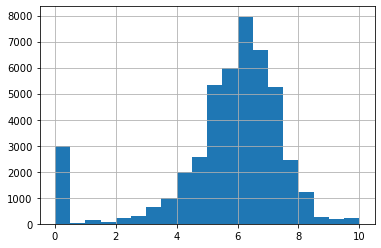

In [68]:
dfv= df['vote_average'].hist(bins=20) # Bine=s: Intervals

We can observe the average number of vote lies around the value 6-7

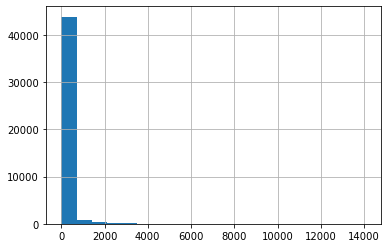

In [69]:
dfv= df['vote_count'].hist(bins=20)

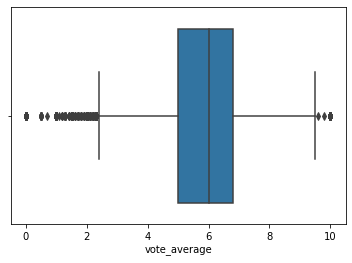

In [70]:
sns.boxplot(df["vote_average"])

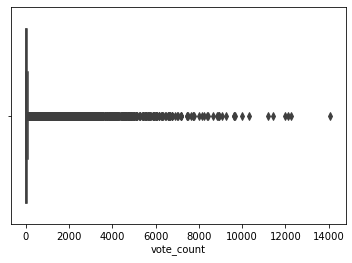

In [71]:
sns.boxplot(df["vote_count"])

__Huge number of Outliers in this feature__

## Building Recommender system

In [72]:
c = df["vote_average"].mean()
c

5.618207215133889

In [73]:
m = df["vote_count"].quantile(0.9) # 90% of the data is taken into consideraation
m # Shows the value where the 90% of the data lies around

160.0

In [74]:
qm = df[(df["runtime"]>150) & (df["revenue"]>300000000) & (df["homepage"].notna())]
# get movies with more than 150min , more revenue & homepage is available
qm.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,1993-11-29,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,1997-11-18,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0
4766,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,...,2001-11-16,9.764756e+08,152.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,False,7.5,7188.0
4863,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120,tt0120737,en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",...,2001-12-18,8.713684e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,False,8.0,8892.0
5814,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,121,tt0167261,en,The Lord of the Rings: The Two Towers,Frodo and Sam are trekking to Mordor to destro...,...,2002-12-18,9.262874e+08,179.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Power Is Rising.,The Lord of the Rings: The Two Towers,False,8.0,7641.0


In [75]:
qm = qm[qm['vote_count']>=m] 
# filter, of these condition how many lies in the 90% category as we founs above

In [76]:
qm.shape 
# We have filtered the movies based on multiole condiitons above

(27, 24)

In [77]:
qm['vote_count']>m

522      True
1639     True
4766     True
4863     True
5814     True
7000     True
10554    True
11008    True
11067    True
11827    True
12481    True
13219    True
13605    True
13893    True
14416    True
14551    True
17293    True
18252    True
19971    True
20051    True
20062    True
22059    True
22131    True
22879    True
23617    True
31072    True
31865    True
Name: vote_count, dtype: bool

In [78]:
def wr(x,m=m,c=c): # c- average of the total vote_average
    v = x['vote_count'] # Total number of votes
    r = x['vote_average'] # average votes
    return (v/(v-m)*r)+(m/(m+v)*c) # 

In [79]:
qm['score']=qm.apply(wr,axis=1)

In [80]:
qm.head(3) # last column 'Score' is added

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,8.806157
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,7.771043
4766,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,...,9.764756e+08,152.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,False,7.5,7188.0,7.793080


In [81]:
qm=qm.sort_values('score', ascending=False)

In [82]:
qm[["title", 'vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
522,Schindler's List,4436.0,8.3,8.806157
12481,The Dark Knight,12269.0,8.3,8.481994
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,8.367867
22879,Interstellar,11187.0,8.1,8.296750
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,8.286331
20062,Les Misérables,1925.0,7.2,8.283825
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,8.245893
13605,Inglourious Basterds,6598.0,7.9,8.229349
22131,The Wolf of Wall Street,6768.0,7.9,8.221034
22059,The Hobbit: The Desolation of Smaug,4633.0,7.6,8.059400


Text(0.5, 1.0, 'Most voted Movies')

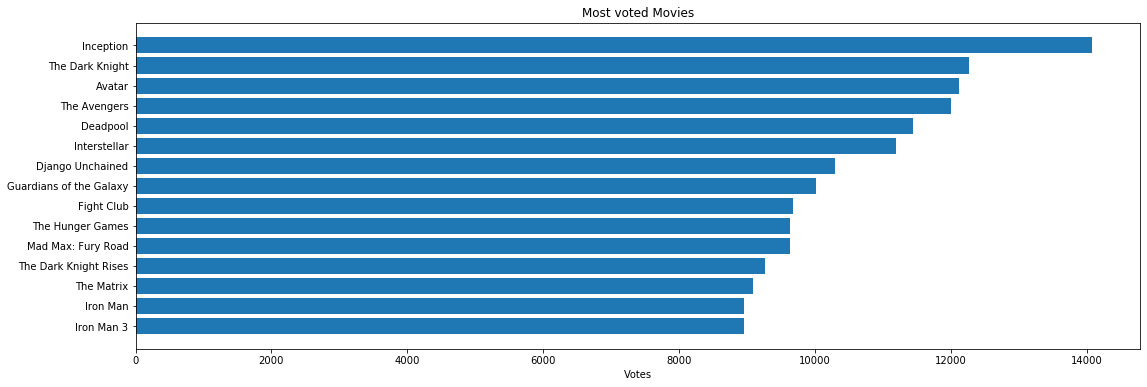

In [83]:
d = df.sort_values('vote_count',ascending=False)
plt.figure(figsize=(18,6))

plt.barh(d['title'].head(15),d['vote_count'].head(15),align='center')
plt.gca().invert_yaxis()
plt.xlabel('Votes')
plt.title("Most voted Movies")

__These are the top 15 movies to be recommended to all based on the data set__

## Treating the missing values & outliers

In [84]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


Since we have missing values & outliers

In [95]:
num_missing = (df[['runtime','vote_average','vote_count']]==0).sum()
num_missing

runtime         1558
vote_average    2998
vote_count      2899
dtype: int64

In [97]:
from numpy import nan
df[['runtime','vote_average','vote_count']] = df[['runtime','vote_average','vote_count']].replace(0,nan)

In [99]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                   1821
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average              3004
vote_count                2905
dtype: int64

In [100]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [101]:
df.shape

(45466, 24)

In [102]:
df[['runtime','vote_average','vote_count']] = df[['runtime','vote_average','vote_count']].replace(0,nan)
df.dropna(inplace=True)
df.shape

(690, 24)

In [104]:
df.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
68,False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,...,1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0
69,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,...,1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0
153,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,"[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",...,1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0
178,False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.powerrangers.com/,9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,...,1995-06-30,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0
219,False,"{'id': 182813, 'name': 'Clerks Collection', 'p...",27000,"[{'id': 35, 'name': 'Comedy'}]",http://www.miramax.com/movie/clerks/,2292,tt0109445,en,Clerks,Convenience and video store clerks Dante and R...,...,1994-09-13,3151130.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because they serve you doesn't mean they ...,Clerks,False,7.4,769.0
256,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,11,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,...,1977-05-25,775398007.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8.1,6778.0
309,False,"{'id': 144200, 'name': 'Swan Princess Series',...",35000000,"[{'id': 16, 'name': 'Animation'}]",http://www.sonypictures.com/movies/theswanprin...,22586,tt0111333,en,The Swan Princess,The beautiful princess Odette is transformed i...,...,1994-11-18,9771658.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An enchanting classic destined to capture your...,The Swan Princess,False,6.5,251.0
359,False,"{'id': 94032, 'name': 'The Lion King Collectio...",45000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://movies.disney.com/the-lion-king,8587,tt0110357,en,The Lion King,A young lion cub named Simba can't wait to be ...,...,1994-06-23,788241776.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Life's greatest adventure is finding your plac...,The Lion King,False,8.0,5520.0
475,False,"{'id': 328, 'name': 'Jurassic Park Collection'...",63000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",http://www.jurassicpark.com/,329,tt0107290,en,Jurassic Park,A

In [106]:
df.isnull().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

### Here we can observe that the dinal data now has no missing values in it 

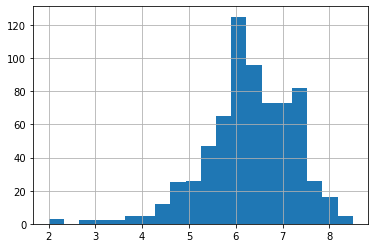

In [107]:
dfv= df['vote_average'].hist(bins=20) # Bine=s: Intervals

We can observe here that the average vote is around 6 - 6.5

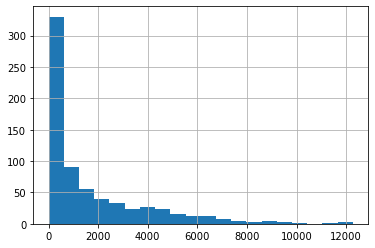

In [108]:
dfv= df['vote_count'].hist(bins=20)

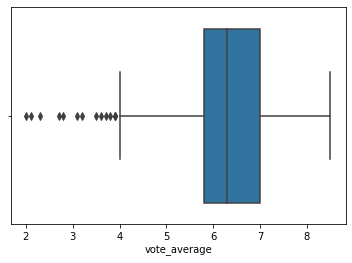

In [109]:
sns.boxplot(df["vote_average"])

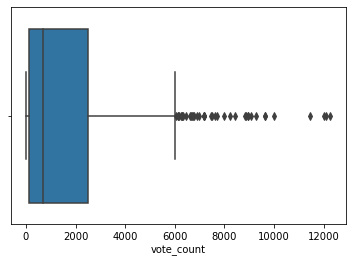

In [110]:
sns.boxplot(df["vote_count"])

Here we can compare from the above plot that, the outliers are removed to some extent

In [111]:
c = df["vote_average"].mean()
c

6.288405797101456

In [112]:
m = df["vote_count"].quantile(0.9) # 90% of the data is taken into consideraation
m # Shows the value where the 90% of the data lies around

4885.900000000001

In [113]:
qm = df[(df["runtime"]>150) & (df["revenue"]>300000000) & (df["homepage"].notna())]
# get movies with more than 150min , more revenue & homepage is available
qm.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
4766,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,...,2001-11-16,9.764756e+08,152.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,False,7.5,7188.0
4863,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120,tt0120737,en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",...,2001-12-18,8.713684e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,False,8.0,8892.0
5814,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,121,tt0167261,en,The Lord of the Rings: The Two Towers,Frodo and Sam are trekking to Mordor to destro...,...,2002-12-18,9.262874e+08,179.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Power Is Rising.,The Lord of the Rings: The Two Towers,False,8.0,7641.0
7000,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",94000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net,122,tt0167260,en,The Lord of the Rings: The Return of the King,Aragorn is revealed as the heir to the ancient...,...,2003-12-01,1.118889e+09,201.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The eye of the enemy is moving.,The Lord of the Rings: The Return of the King,False,8.1,8226.0
10554,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/,674,tt0330373,en,Harry Potter and the Goblet of Fire,"Harry starts his fourth year at Hogwarts, comp...",...,2005-11-05,8.959210e+08,157.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Dark And Difficult Times Lie Ahead.,Harry Potter and the Goblet of Fire,False,7.5,5758.0


In [114]:
qm = qm[qm['vote_count']>=m] 
# filter, of these condition how many lies in the 90% category as we founs above

In [115]:
qm.shape 
# We have filtered the movies based on multiole condiitons above

(12, 24)

Here we can observe that we only have 12 movies after this much filtering

In [116]:
qm['vote_count']>m

4766     True
4863     True
5814     True
7000     True
10554    True
11008    True
12481    True
13893    True
14551    True
18252    True
19971    True
31072    True
Name: vote_count, dtype: bool

In [117]:
def wr(x,m=m,c=c): # c- average of the total vote_average
    v = x['vote_count'] # Total number of votes
    r = x['vote_average'] # average votes
    return (v/(v-m)*r)+(m/(m+v)*c) # 

In [118]:
qm['score']=qm.apply(wr,axis=1)

In [119]:
qm.head(3) # last column 'Score' is added

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
4766,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,...,976475550.0,152.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,False,7.5,7188.0,25.962455
4863,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120,tt0120737,en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",...,871368364.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,False,8.0,8892.0,19.986907
5814,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,121,tt0167261,en,The Lord of the Rings: The Two Towers,Frodo and Sam are trekking to Mordor to destro...,...,926287400.0,179.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Power Is Rising.,The Lord of the Rings: The Two Towers,False,8.0,7641.0,24.639900


In [120]:
qm=qm.sort_values('score', ascending=False)

In [121]:
qm[["title", 'vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
11008,Pirates of the Caribbean: Dead Man's Chest,5380.0,7.0,79.212261
13893,Harry Potter and the Half-Blood Prince,5435.0,7.4,76.222233
10554,Harry Potter and the Goblet of Fire,5758.0,7.5,52.404989
4766,Harry Potter and the Philosopher's Stone,7188.0,7.5,25.962455
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,24.639900
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,22.291939
31072,Batman v Superman: Dawn of Justice,7189.0,5.7,20.336731
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,19.986907
19971,The Hobbit: An Unexpected Journey,8427.0,7.0,18.966259
18252,The Dark Knight Rises,9263.0,7.6,18.254947


We can observe here that the Score value changes drastically for the new data set without any missing values

Text(0.5, 1.0, 'Most voted Movies')

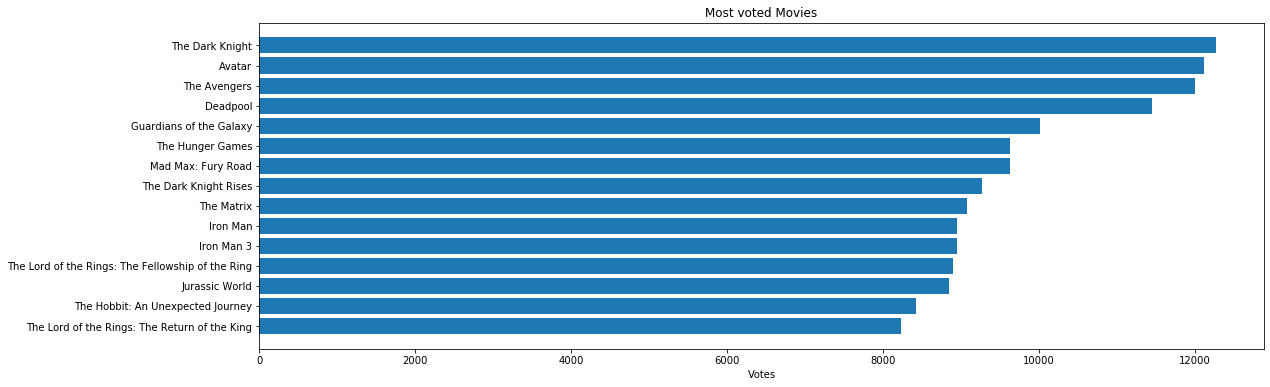

In [122]:
d = df.sort_values('vote_count',ascending=False)
plt.figure(figsize=(18,6))

plt.barh(d['title'].head(15),d['vote_count'].head(15),align='center')
plt.gca().invert_yaxis()
plt.xlabel('Votes')
plt.title("Most voted Movies")

__Here the movies are not exactly the same as above__